## Introduction. 
#### What is the context of the work? What research question are you trying to answer? What are your main findings? Include a brief summary of your results.

The context of this work...


The research questions this work will answer are:
1) What is the relationship between IMDb scores and Rotten Tomatoes scores for movies on Netflix? Do audiencea and/or critics agree on the quality of a movie (do they both give high scores or low scores)?

2) How does the year the film was released relate to its IMDb score? How does it relate to its Rotten Tomatoes score? Have audiences and/or critics scored higher or lower for older or newer movies?

3) How does runtime relate to IMDb and Rotten Tomatoes scores, and how has runtime for movies on Netflix changed over the years? Do audiences and/or critics give higher scores to long or short films?

4) How do IMDb and Rotten Tomatoes scores vary by platform? Which platform has the average highest IMDb and Rotten Tomatoes scores for the movies they stream?

5) How does target age range for movies differ across platforms? Do some platforms gear towards younger or older audiences more so than others?


The findings from this work and a brief summary include...

## Data description. 
#### What are the observations (rows) and the attributes (columns)? Why was this dataset created? Who funded the creation of the dataset? What processes might have influenced what data was observed and recorded and what was not? What preprocessing was done, and how did the data come to be in the form that you are using? If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for? Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box)

## Preregistration statement. 

My first analysis will look at the relationship between runtime and IMDb scores (and a separate anlysis that looks at runtime and Rotten Tomatoes scores). This will answer my third research quetion: how does runtime relate to IMDb and Rotten Tomatoes scores? Do audiences and/or critics giver higher scores to long or short films?
To perform this analysis, I will use runtime as a predictor and then IMDb scores (and Rotten Tomatoes scores in a separate analysis) as my input in a linear regression. 
This analysis will help determine how/if runtime affects critics' and audiences' scores of a movie. This is interesting information for individuals in the entertainment industry as well as the streaming space, as they may tailor the films they make or the films they show on their platform based on runtime if audiences/critics show a tendancy to favor a short or long film. 


My second analysis will look at the relationship between IMDb scores and Rotten Tomatoes scores. This will answer my first research question: what is the relationship between IMDb scores and Rotten Tomatoes scores for movies on Netflix? Do audiences and/or critics agree on the quality of a movie (do they both give high scores or low scores)?
To perform this analysis, I will use IMDb as my input and Rotten Tomatoes as my predictor in a linear regression. This will show if Rotten Tomatoes scores (audience scores) can be predicted from IMDb scores (critics' scores). 
This analysis will show an interesting relationship (or lack of relationship) between critics' and audiences' scores of a movie.


My third analysis will look at how IMDb and Rotten Tomatoes scores differ aross the streaming platforms in this data (Netflix, Hulu, Prime Video, and Disney+). This will answer my fourth research question: how do IMDb and Rotten Tomatoes scores vary by platform? Which platform has the average highest IMDb and Rotten Tomatoes scores for the movies they stream?
To perform this analysis, I will look at the mean IMDb and Rotten Tomatoes scores by platform.
This analysis will provide insights into which platforms carry the most highly-ranked movies. As consumers of streaming platofrms and the movies on them, this will be interesting information to have to know where to find the "best" (meaning highest-scored) movies. 

## Data analysis.
#### Use summary functions like mean and standard deviation along with visual displays like scatterplots and histograms to describe data. Provide at least one model showing patterns or relationships between variables that addresses your research question. This could be a regression or clustering, or something else that measures some property of the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression as lr
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
# Load CSV
rawdata = pd.read_csv('OTTdata.csv')
# Remove columns
rawdata = rawdata.drop(columns = ['Type', 'Language', 'Country', 'ID'])
# Remove spaces in column names and "+" from Disney+ column name
new_colnames = [x.replace(" ", "_") for x in rawdata.columns]
rawdata.columns = new_colnames
rawdata = rawdata.rename(columns={'Disney+':'DisneyPlus'})
#Remove incomplete rows
rawdata = rawdata.dropna()
#Remove "+" from age ranges, change "all" categorization to 0, and convert values to float
rawdata['Age'] = [x.replace("+", "") for x in rawdata["Age"]]
rawdata['Age'] = [x.replace("all", "0") for x in rawdata["Age"]]
rawdata['Age'] = rawdata['Age'].astype(float)
#Remove % on Rotten Tomatoes score and convert scores to float
rawdata['Rotten_Tomatoes'] = [x.replace("%", "") for x in rawdata["Rotten_Tomatoes"]]
rawdata['Rotten_Tomatoes'] = rawdata['Rotten_Tomatoes'].astype(float)
rawdata['IMDb'] = rawdata['IMDb'].astype(float)
#Remove movies with low or high runtimes
rawdata = rawdata.loc[rawdata.Runtime>60].copy()
rawdata = rawdata.loc[rawdata.Runtime<180].copy()
#Cleaned data is OTTdata
OTTdata = rawdata

#### Summary of IMDb score, Rotten Tomatoes score, and their relationship

mean IMDb score of movies on Netflix
6.373764787752257
IMDb score standard deviation of movies on Netflix
0.9379350694845225
min IMDb score of movies on Netflix
2.5
max IMDb score of movies on Netflix
9.0


mean Rotten Tomatoes score of movies on Netflix
61.807237299930414
Rotten Tomatoes score standard deviation of movies on Netflix
26.68285336930154
min Rotten Tomatoes score of movies on Netflix
2.0
max Rotten Tomatoes score of movies on Netflix
100.0


correlation between IMDb score and Rotten Tomatoes score of movies on Netflix
0.6376943260515737
covariance between IMDb score and Rotten Tomatoes score of movies on Netflix
15.959438110830057


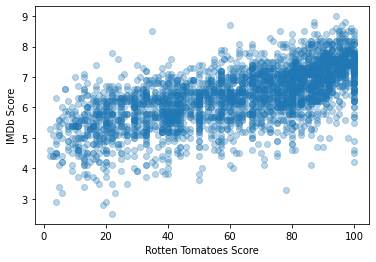

In [28]:
plt.scatter(x = OTTdata['Rotten_Tomatoes'], y = OTTdata['IMDb'], alpha=.3)
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('IMDb Score')
print('mean IMDb score of movies on Netflix')
print(OTTdata['IMDb'].mean())
print('IMDb score standard deviation of movies on Netflix')
print(OTTdata['IMDb'].std())
print('min IMDb score of movies on Netflix')
print(OTTdata['IMDb'].min())
print('max IMDb score of movies on Netflix')
print(OTTdata['IMDb'].max())
print('\n')
print('mean Rotten Tomatoes score of movies on Netflix')
print(OTTdata['Rotten_Tomatoes'].mean())
print('Rotten Tomatoes score standard deviation of movies on Netflix')
print(OTTdata['Rotten_Tomatoes'].std())
print('min Rotten Tomatoes score of movies on Netflix')
print(OTTdata['Rotten_Tomatoes'].min())
print('max Rotten Tomatoes score of movies on Netflix')
print(OTTdata['Rotten_Tomatoes'].max())
print('\n')
print('correlation between IMDb score and Rotten Tomatoes score of movies on Netflix')
print(OTTdata.IMDb.corr(OTTdata.Rotten_Tomatoes))
print('covariance between IMDb score and Rotten Tomatoes score of movies on Netflix')
print(OTTdata.IMDb.cov(OTTdata.Rotten_Tomatoes))

There is a positive relationship between the Rotten Tomatoes score and IMDb score. Becasue the correlation is .63, there is not a perfect relationship. You can see that as Rotten Tomatoes scores increase, the IMDb score tends to increase as well. Interestingly the standard deviation for IMDb scores (.93) is small relative to the scale of scores (0 to 10) and the standard deviation for Rotten Tomatoes scores (26.68) is larger relative to the scale of scores (0 to 100). 

#### First research question and second preregistration statement: What is the relationship between IMDb scores and Rotten Tomatoes scores for movies on Netflix? Do audiences and/or critics agree on the quality of a movie (do they both give high scores or low scores)?

linear regression slope:  18.14
r^2:  0.4066540534783645


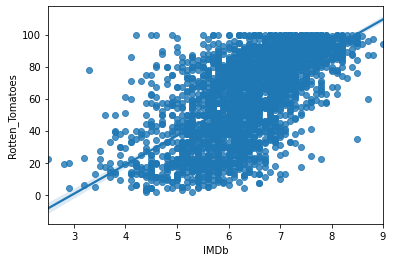

In [24]:
sns.regplot(x="IMDb", y="Rotten_Tomatoes", data=OTTdata);
regression = lr()
x = np.array(OTTdata['IMDb'])
y = np.array(OTTdata['Rotten_Tomatoes'])
fitx = x.reshape(-1,1)
fity = y
reg = regression.fit(fitx, fity)
ypredicted = regression.predict(fitx)
meany = sum(y) / len(y)
SST = sum((y - meany) ** 2)
SSR = sum((y - ypredicted) ** 2)
coefdet = 1 - (SSR/SST)
print ('linear regression slope: ', round(reg.coef_[0],2))
print ('r^2: ', coefdet)

#### Summary of Runtime, IMDb score, Rotten Tomatoes score, and their relationship

In [34]:
print('mean Runtime of movies on Netflix')
print(OTTdata['Runtime'].mean())
print('min Runtime of movies on Netflix')
print(OTTdata['Runtime'].min())
print('max Runtime of movies on Netflix')
print(OTTdata['Runtime'].max())
print('Runtime standard deviation of movies on Netflix')
print(OTTdata['Runtime'].std())

mean Runtime of movies on Netflix
103.25434933890048
min Runtime of movies on Netflix
61.0
max Runtime of movies on Netflix
177.0
Runtime standard deviation of movies on Netflix
17.147778796644083


The runtime of movies on Netflix averages an hour and 43 minutes. Movies made after 1980 also have a more consistent runtime of around 100 minutes (which is interestingly around the mean runtime of all movies on Netflix, suggesting the majority of the movies on Netflix are from 1980 onwards).

correlation between Runtime and Rotten Tomatoes score
0.07192514666709637
covariance between Runtime and Rotten Tomatoes score
32.90947077401702


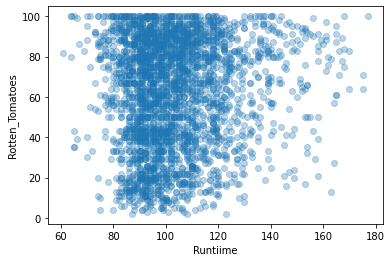

In [30]:
plt.scatter(x = OTTdata['Runtime'], y = OTTdata['Rotten_Tomatoes'], alpha=.3)
plt.xlabel('Runtiime')
plt.ylabel('Rotten_Tomatoes')

print('correlation between Runtime and Rotten Tomatoes score')
print(OTTdata.Runtime.corr(OTTdata.Rotten_Tomatoes))
print('covariance between Runtime and Rotten Tomatoes score')
print(OTTdata.Runtime.cov(OTTdata.Rotten_Tomatoes))

The correlation between Rotten Tomatoes scores and Runtime is really close to zero, meaning there is likely no correlation or relationship between the two. 

correlation between Runtime and IMDb Tomatoes score
0.2667396000903218
covariance between Runtime and IMDb score
4.290107184181377


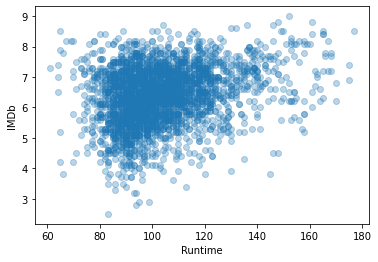

In [31]:
plt.scatter(x = OTTdata['Runtime'], y = OTTdata['IMDb'], alpha=.3)
plt.xlabel('Runtime')
plt.ylabel('IMDb')
print('correlation between Runtime and IMDb Tomatoes score')
print(OTTdata.Runtime.corr(OTTdata.IMDb))
print('covariance between Runtime and IMDb score')
print(OTTdata.Runtime.cov(OTTdata.IMDb))

There is a slightly positive correlation between the IMDb score and runtime of movies on Netflix, so as runtime increases IMBDb scores increase slightly too. 

#### Third research question and first preregistration analysis: How does runtime relate to IMDb and Rotten Tomatoes scores, and how has runtime for movies on Netflix changed over the years? Do audiences and/or critics give higher scores to long or short films?

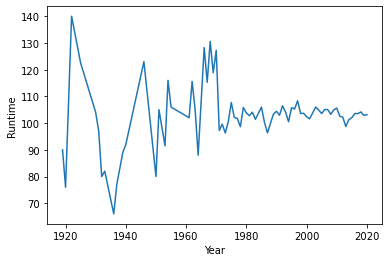

In [35]:
yearuniquelist = OTTdata['Year'].unique()
yearuniquelist = np.sort(yearuniquelist)
plt.plot(yearuniquelist,[OTTdata[OTTdata['Year']==i].loc[:,'Runtime'].mean() for i in yearuniquelist])
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.show()

linear regression slope:  0.01
r^2:  0.07115001425635481


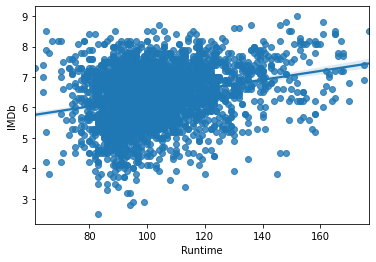

In [32]:
sns.regplot(x="Runtime", y="IMDb", data=OTTdata);
regression = lr()
x = np.array(OTTdata['Runtime'])
y = np.array(OTTdata['IMDb'])
fitx = x.reshape(-1,1)
fity = y
reg = regression.fit(fitx, fity)
ypredicted = regression.predict(fitx)
meany = sum(y) / len(y)
SST = sum((y - meany) ** 2)
SSR = sum((y - ypredicted) ** 2)
coefdet = 1 - (SSR/SST)
print ('linear regression slope: ', round(reg.coef_[0],2))
print ('r^2: ', coefdet)

linear regression slope:  0.11
r^2:  0.005173226723067081


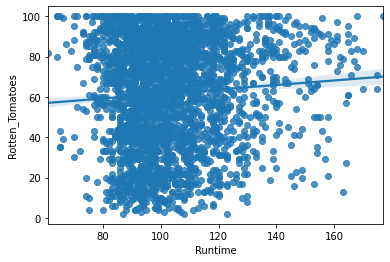

In [33]:
sns.regplot(x="Runtime", y="Rotten_Tomatoes", data=OTTdata);
regression = lr()
x = np.array(OTTdata['Runtime'])
y = np.array(OTTdata['Rotten_Tomatoes'])
fitx = x.reshape(-1,1)
fity = y
reg = regression.fit(fitx, fity)
ypredicted = regression.predict(fitx)
meany = sum(y) / len(y)
SST = sum((y - meany) ** 2)
SSR = sum((y - ypredicted) ** 2)
coefdet = 1 - (SSR/SST)
print ('linear regression slope: ', round(reg.coef_[0],2))
print ('r^2: ', coefdet)

#### Release year, IMDb score, Rotten Tomatoes score, and their relationship. This addresses my third preregistration analysis and my second research question: How does the year the film was released relate to its IMDb score? How does it relate to its Rotten Tomatoes score? Have audiences and/or critics scored higher or lower for older or newer movies?

In [38]:
#summary of release year data
print('mean year of movies on Netflix')
print(OTTdata['Year'].mean())

mean year of movies on Netflix
2007.2393876130827


correlation between IMDb score and year
-0.1266958628891991
covariance between IMDb score and year
-1.638687843360096


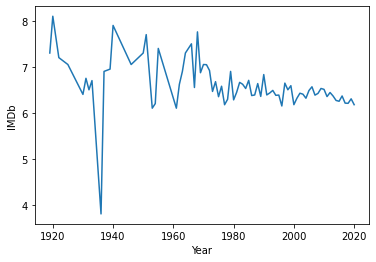

In [39]:
# release year and IMDb score
print('correlation between IMDb score and year')
print(OTTdata.IMDb.corr(OTTdata.Year))
print('covariance between IMDb score and year')
print(OTTdata.IMDb.cov(OTTdata.Year))
yearuniquelist = OTTdata['Year'].unique()
yearuniquelist = np.sort(yearuniquelist)
plt.plot(yearuniquelist,[OTTdata[OTTdata['Year']==i].loc[:,'IMDb'].mean() for i in yearuniquelist])
plt.xlabel('Year')
plt.ylabel('IMDb')
plt.show()

The correlation between IMDb score and year is negative but small, which aligns with the graph in suggesting that IMDb scores have slightly gone down as years go on. 

correlation between Rotten Tomatoes score and year
-0.04349070033389965
covariance between Rotten Tomatoes score and year
-16.00256848672196


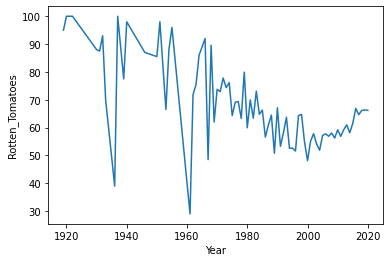

In [40]:
# release year and Rotten Tomatoes score
print('correlation between Rotten Tomatoes score and year')
print(OTTdata.Rotten_Tomatoes.corr(OTTdata.Year))
print('covariance between Rotten Tomatoes score and year')
print(OTTdata.Rotten_Tomatoes.cov(OTTdata.Year))
yearuniquelist = OTTdata['Year'].unique()
yearuniquelist = np.sort(yearuniquelist)
plt.plot(yearuniquelist,[OTTdata[OTTdata['Year']==i].loc[:,'Rotten_Tomatoes'].mean() for i in yearuniquelist])
plt.xlabel('Year')
plt.ylabel('Rotten_Tomatoes')
plt.show()

The correlation between Rotten Tomatoes score and year is small but negative, which aligns with the graph in suggesting that Rotten Tomatoes scores have gone down slightly for movies made in later years.

#### IMDb score and Rotten Tomatoes score by platform. This answeres my fourth research question: How do IMDb and Rotten Tomatoes scores vary by platform? Which platform has the average highest IMDb and Rotten Tomatoes scores for the movies they stream?

mean IMDb score for movies on Netflix
6.412410986775183


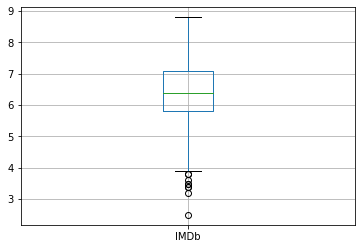

In [8]:
# IMDbscores by platform - Netflix
Netflixmovies = OTTdata[OTTdata.Netflix==1]
Netflixmovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Netflix')
print(Netflixmovies['IMDb'].mean())

The mean IMDb score for movies on Netflix is around 6.41.

mean IMDb score for movies on Prime Video
6.316637375512601


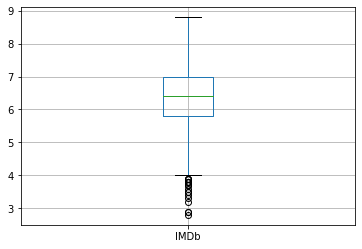

In [9]:
Prime_Videomovies = OTTdata[OTTdata.Prime_Video==1]
Prime_Videomovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Prime Video')
print(Prime_Videomovies['IMDb'].mean())

The mean IMDb score for movies that are on Netflix and Prime Video is 6.3.

mean IMDb score for movies on Disney+
6.677777777777779


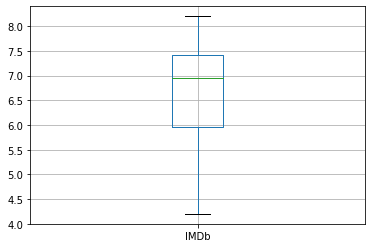

In [10]:
Disneymovies = OTTdata[OTTdata.DisneyPlus==1]
Disneymovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Disney+')
print(Disneymovies['IMDb'].mean())

The mean IMDb score for movies that are on Netflix and Disney+ is 6.67.

mean IMDb score for movies on Hulu
6.456410256410259


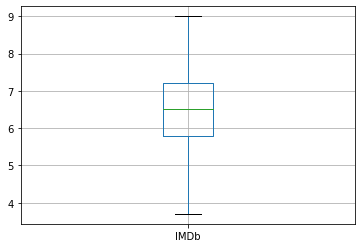

In [11]:
Hulumovies = OTTdata[OTTdata.Hulu==1]
Hulumovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Hulu')
print(Hulumovies['IMDb'].mean())

The mean IMDb score for movies that are on Netflix and Hulu is 6.45.

#### Age data and platform. This addresses my fifth research question: How does target age range for movies differ across platforms? Do some platforms gear towards younger or older audiences more so than others?

mean age minimum for movies on Hulu
14.564102564102564
standard deviation of age minimum for movies on Hulu
4.596699135545754


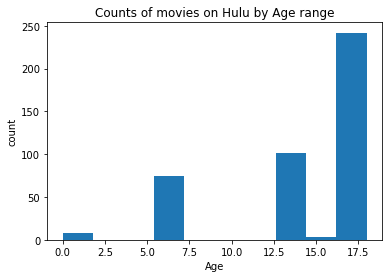

In [12]:
#age data and Hulu
Hulumovies = OTTdata[OTTdata.Hulu==1]
plt.hist(Hulumovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Hulu by Age range')
print('mean age minimum for movies on Hulu')
print(Hulumovies['Age'].mean())
print('standard deviation of age minimum for movies on Hulu')
print(Hulumovies['Age'].std())

Movies on Hulu tend to skew older, and have a mean minimum age of 14.5.

mean age minimum for movies on Disney+
9.5
standard deviation of age minimum for movies on Disney+
4.817248421343991


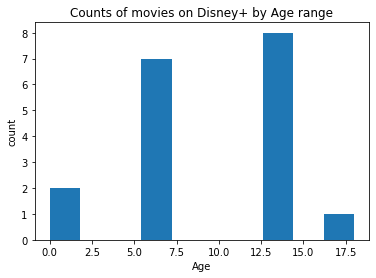

In [13]:
Disneymovies = OTTdata[OTTdata.DisneyPlus==1]
plt.hist(Disneymovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Disney+ by Age range')
print('mean age minimum for movies on Disney+')
print(Disneymovies['Age'].mean())
print('standard deviation of age minimum for movies on Disney+')
print(Disneymovies['Age'].std())

Although the counts for movies on Disney+ are lower, the mean minimum age is significantly lower than other platforms at 9.5. Interestingly, the standard deviation is similar to Hulu's, suggesting that platforms offer programming within 5 years of their reccommended minimum audience age. 

mean age minimum for movies on Prime Video
14.565319273579378
standard deviation of age minimum for movies on Prime Video
4.84068986519906


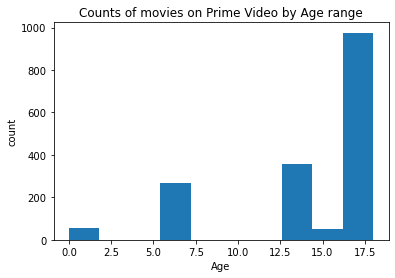

In [14]:
Primemovies = OTTdata[OTTdata.Prime_Video==1]
plt.hist(Primemovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Prime Video by Age range')
print('mean age minimum for movies on Prime Video')
print(Primemovies['Age'].mean())
print('standard deviation of age minimum for movies on Prime Video')
print(Primemovies['Age'].std())

Prime Video has a similar mean minimum age to Hulu at 14.5, suggesting it might have similar target audiences.

mean age minimum for movies on Netflix
14.442522889114954
standard deviation of age minimum for movies on Netflix
4.633459131870704


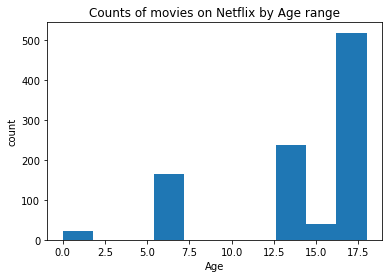

In [15]:
Netflixmovies = OTTdata[OTTdata.Netflix==1]
plt.hist(Netflixmovies.loc[:,"Age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Counts of movies on Netflix by Age range')

print('mean age minimum for movies on Netflix')
print(Netflixmovies['Age'].mean())
print('standard deviation of age minimum for movies on Netflix')
print(Netflixmovies['Age'].std())

Netflix has a similar mean minimum age to Hulu and Prime Video at 14.4, again suggesting it might have similar target audiences. It also has a standard deviation of 4.6 for minimum reccommended audience age which is similar to the other platforms. 

linear regression slope:  18.14
r^2:  0.4066540534783645


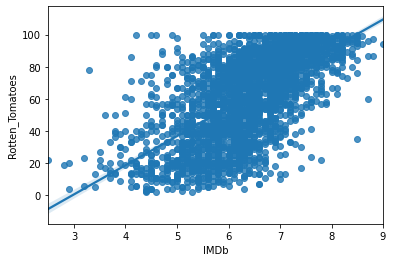

mean IMDb score for movies on Netflix
6.412410986775183


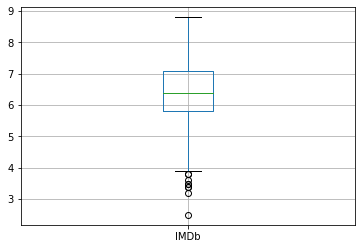

In [51]:
##third preregistration statement
Netflixmovies = OTTdata[OTTdata.Netflix==1]
Netflixmovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Netflix')
print(Netflixmovies['IMDb'].mean())

mean IMDb score for movies on Prime Video
6.316637375512601


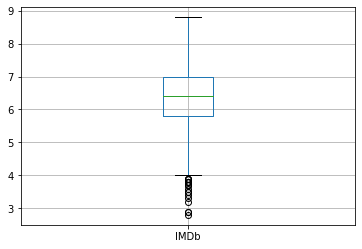

In [52]:
##third preregistration statement
Prime_Videomovies = OTTdata[OTTdata.Prime_Video==1]
Prime_Videomovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Prime Video')
print(Prime_Videomovies['IMDb'].mean())

mean IMDb score for movies on Disney+
6.677777777777779


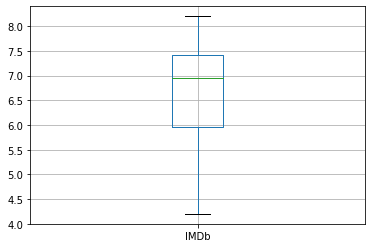

In [53]:
##third preregistration statement
Disneymovies = OTTdata[OTTdata.DisneyPlus==1]
Disneymovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Disney+')
print(Disneymovies['IMDb'].mean())

mean IMDb score for movies on Hulu
6.456410256410259


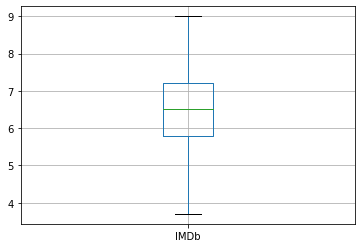

In [54]:
##third preregistration statement
Hulumovies = OTTdata[OTTdata.Hulu==1]
Hulumovies.boxplot(column='IMDb')
print('mean IMDb score for movies on Hulu')
print(Hulumovies['IMDb'].mean())

The mean IMDb score for movies on Netflix is around 6.41.... ADD SUMMARY OF WHAT THESE FOUR BOX CHARTS MEAN

In [55]:
# OTTdata['platform'] = np.nan
# for x in OTTdata['Netflix']:
#     if x == 1:
#         OTTdata['platform']
#     print(x)

In [56]:
# sns.lmplot(x="Runtime", y="Rotten_Tomatoes", hue="platform", data=OTTdata);

# pengsdummies = pd.get_dummies(pengs['species'])
# pengs = pengs.join(pengsdummies)

# regression = LinearRegression()
# x = pengs[['bill_length_mm', 'Adelie', 'Chinstrap', 'Gentoo']]
# y = np.array(pengs['bill_depth_mm'])
# fitx = x
# fity = y
# reg = regression.fit(fitx, fity)
# print ('linear regression slope: ', round(reg.coef_[0],2))

Evaluation of significance. Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness.

In [67]:
sm_model = smf.ols('IMDb ~ Rotten_Tomatoes', data=OTTdata)
result = sm_model.fit()
result.pvalues

##low p value = reject null hypothesis (that there is not a relationship) --> therefore there is a relationship (p value suggests this)

Intercept          0.0
Rotten_Tomatoes    0.0
dtype: float64

In [42]:
train, test = train_test_split(OTTdata, test_size=0.2, random_state=15)
OTTdatamodel = LogisticRegression().fit(train[['Rotten_Tomatoes']], train['Netflix'])
print('logistic regression coefficient Netflix: {:.7f}'.format(OTTdatamodel.coef_[0,0]))
OTTdatamodel = LogisticRegression().fit(train[['Rotten_Tomatoes']], train['Hulu'])
print('logistic regression coefficient Hulu: {:.7f}'.format(OTTdatamodel.coef_[0,0]))
OTTdatamodel = LogisticRegression().fit(train[['Rotten_Tomatoes']], train['DisneyPlus'])
print('logistic regression coefficient Disney+: {:.7f}'.format(OTTdatamodel.coef_[0,0]))
OTTdatamodel = LogisticRegression().fit(train[['Rotten_Tomatoes']], train['Prime_Video'])
print('logistic regression coefficient Prime Video: {:.7f}'.format(OTTdatamodel.coef_[0,0]))

OTTdatamodel = LogisticRegression().fit(train[['IMDb']], train['Netflix'])
print('logistic regression coefficient Netflix: {:.7f}'.format(OTTdatamodel.coef_[0,0]))
OTTdatamodel = LogisticRegression().fit(train[['IMDb']], train['Hulu'])
print('logistic regression coefficient Hulu: {:.7f}'.format(OTTdatamodel.coef_[0,0]))
OTTdatamodel = LogisticRegression().fit(train[['IMDb']], train['DisneyPlus'])
print('logistic regression coefficient Disney+: {:.7f}'.format(OTTdatamodel.coef_[0,0]))
OTTdatamodel = LogisticRegression().fit(train[['IMDb']], train['Prime_Video'])
print('logistic regression coefficient Prime Video: {:.7f}'.format(OTTdatamodel.coef_[0,0]))

##p value and t test

logistic regression coefficient Netflix: 0.0003150
logistic regression coefficient Hulu: 0.0059102
logistic regression coefficient Disney+: 0.0250406
logistic regression coefficient Prime Video: -0.0062895
logistic regression coefficient Netflix: 0.0699909
logistic regression coefficient Hulu: 0.1253265
logistic regression coefficient Disney+: 0.6280343
logistic regression coefficient Prime Video: -0.1669657


Interpretation and conclusions. What did you find over the course of your data analysis, and how confident are you in these conclusions? Detail your results more so than in the introduction, now that the reader is familiar with your methods and analysis. Interpret these results in the wider context of the real-life application from where your data hails.

Limitations. What are the limitations of your study? What are the biases in your data or assumptions of your analyses that specifically affect the conclusions you’re able to draw?

Source code. Provide a link to your Github repository (or other file hosting site) that has all of your project code (if applicable). For example, you might include web scraping code or data filtering and aggregation code.

Acknowledgments. Recognize any people or online resources that you found helpful. These can be tutorials, software packages, Stack Overflow questions, peers, and data sources. Showing gratitude is a great way to feel happier! But it also has the nice side-effect of reassuring us that you're not passing off someone else's work as your own. Crossover with other courses is permitted and encouraged, but it must be clearly stated, and it must be obvious what parts were and were not done for 2950. Copying without attribution robs you of the chance to learn, and wastes our time investigating.

Appendix: Data cleaning description. Submit an updated version of your data cleaning description from phase II that describes all data cleaning steps performed on your raw data to turn it into the analysis-read dataset submitted with your final project. The data cleaning description should be a separate Jupyter notebook with executed cells, and it should output the dataset you submit as part of your project (e.g. written as a .csv file).